In [1]:
import pandas as pd
import pickle as pickle
import numpy as np
from datetime import datetime # para trabajar las fechas
from calendar import monthrange

from dateutil.relativedelta import relativedelta
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings; warnings.simplefilter('ignore')
import seaborn as sb
import datetime
from datetime import date

pd.set_option('display.max_columns', None)

In [2]:
from scipy.special import rel_entr

# calculate the jensen-shannon distance metric
from scipy.spatial.distance import jensenshannon

In [3]:
def color_negative_red(value):
    """
    Colors elements in a dateframe
    green if positive and red if
    negative. Does not color NaN
    values.
    """

    if value > 0.37:
        color = 'red'
    else:
        color = 'green'

    return 'color: %s' % color

In [15]:
features_selected = np.load('data/features/features_selected.npy').tolist()

In [10]:
train = pd.read_pickle('data/features/train_features_002.pkl')

In [24]:
train.columns = [str(c) for c in train.columns]

In [5]:
train.shape

(17690, 157)

In [6]:
test = pd.read_pickle('data/features/submit_features_002.pkl')

In [25]:
test.columns = [str(c) for c in test.columns]

In [26]:
test.shape

(1000, 157)

In [28]:
train = train[features_selected]

In [29]:
test = test[features_selected]

In [30]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [31]:
features_to_compare = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [33]:
len(features_to_compare)

89

In [32]:
train[features_to_compare].head()

,Activity,Air Show,All Star Sorting,Assessment,Bottle Filler (Activity),Bug Measurer (Activity),Chicken Balancer (Activity),Chow Time,Clip,Crystals Rule,Dino Dive,Egg Dropper (Activity),Fireworks (Activity),Flower Waterer (Activity),Game,Happy Camel,Leaf Leader,Pan Balance,Sandcastle Builder (Activity),Scrub-A-Dub,Bubble Bath,Dino Drink,Watering Hole (Activity),2050,4100,2060,4110,2070,2075,2081,4220,4230,5000,4021,4022,4031,4035,4040,4045,4050,2010,4070,2025,4080,4090,4095,Bug Measurer (Activity)_count,"Heavy, Heavier, Heaviest_count",Tree Top City - Level 2_count,Honey Cake_count,Crystals Rule_count,Balancing Act_count,Slop Problem_count,Happy Camel_count,Magma Peak - Level 1_count,Fireworks (Activity)_count,Pan Balance_count,Scrub-A-Dub_count,All Star Sorting_count,Costume Box_count,Rulers_count,12 Monkeys_count,Flower Waterer (Activity)_count,Sandcastle Builder (Activity)_count,Bottle Filler (Activity)_count,Crystal Caves - Level 3_count,Treasure Map_count,Welcome to Lost Lagoon!_count,Chicken Balancer (Activity)_count,Dino Dive_count,Air Show_count,Chow Time_count,Egg Dropper (Activity)_count,Leaf Leader_count,Watering Hole (Activity)_count,Magma Peak - Level 2_count,Dino Drink_count,Ordering Spheres_count,Bubble Bath_count,Lifting Heavy Things_count,session_title,duration_mean,accumulated_accuracy,1,2,installation_session_count,installation_duration_mean,installation_title_nunique,installation_event_code_count_mean
0006a69f,3,0,163,0,0,0,0,0,11,0,0,0,91,164,4,0,0,0,89,115,0,0,0,6,0,0,0,0,0,1,0,0,0,14,31,0,1,0,0,0,0,94,4,0,4,0,0,0,1,0,0,0,1,0,1,1,0,1,3,2,0,1,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,35,0.00,0.0,0,0,5,36.99,2,1553.0
0006a69f,4,193,163,1,0,104,0,0,14,78,0,0,91,164,6,0,0,0,89,115,0,0,0,6,5,1,2,1,0,1,0,0,0,14,31,0,6,2,0,0,1,156,5,0,4,0,1,0,1,0,1,0,1,0,1,1,0,1,3,2,1,1,1,1,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,2,39.00,1.0,0,0,5,36.99,2,1553.0
0006a69f,4,193,163,2,0,104,0,0,14,78,0,0,91,164,6,0,0,0,89,115,0,0,0,6,5,1,13,1,0,1,0,0,0,14,31,0,6,2,0,0,1,160,5,0,4,0,1,0,1,0,1,0,1,0,1,1,0,1,3,2,1,1,1,1,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,0,35,65.50,0.5,0,0,5,36.99,2,1553.0
0006a69f,9,193,229,4,165,104,0,0,24,78,0,0,1611,254,10,0,0,0,126,195,133,110,80,9,6,2,13,2,0,2,9,0,5,29,45,6,14,9,2,0,2,348,9,0,4,1,1,0,2,0,1,0,2,0,2,2,0,2,4,3,1,2,2,2,1,0,1,3,0,0,1,0,0,0,1,1,1,2,1,0,35,41.25,0.5,0,0,5,36.99,2,1553.0
0006a69f,10,336,229,5,165,184,0,0,28,310,0,0,1611,254,13,0,0,0,126,195,133,110,80,9,12,3,13,2,1,2,9,0,5,29,45,6,15,10,2,0,3,387,10,0,4,1,2,0,2,0,3,0,2,0,2,2,0,2,4,3,2,2,2,2,1,0,3,3,0,0,2,0,0,0,1,1,1,2,1,0,2,39.20,0.5,0,1,5,36.99,2,1553.0


In [34]:

jensen_shannon_div = []
kullback_leibler_div = []

for f in features_to_compare:
    p = train[f].tolist()
    q = test[f].tolist()
    
    minlen = min([len(p),len(q)])
    
    
    kl_pq = rel_entr( q[:minlen],p[:minlen])
    kullback_leibler_div.append(sum(kl_pq))
   
    
    js_qp = jensenshannon(p[:minlen], q[:minlen], base=2)
    jensen_shannon_div.append(js_qp)

In [35]:
features_divergence = {'features': features_to_compare,
                       'Kullback Leibler divergence': kullback_leibler_div,
                       'Jensen Shannon divergence': jensen_shannon_div}

In [36]:
features_divergence = pd.DataFrame(features_divergence)

In [37]:
features_divergence.style.applymap(color_negative_red, subset=['Jensen Shannon divergence'])

,features,Kullback Leibler divergence,Jensen Shannon divergence
0,Activity,inf,0.632208
1,Air Show,inf,0.940316
2,All Star Sorting,inf,0.897286
3,Assessment,inf,0.786441
4,Bottle Filler (Activity),inf,0.850075
5,Bug Measurer (Activity),inf,0.887211
6,Chicken Balancer (Activity),inf,0.88874
7,Chow Time,inf,0.863094
8,Clip,inf,0.676595
9,Crystals Rule,inf,0.942131


In [38]:
train['label'] = 'Train'
test['label'] = 'Test'

In [39]:
dataset = train.append(test)

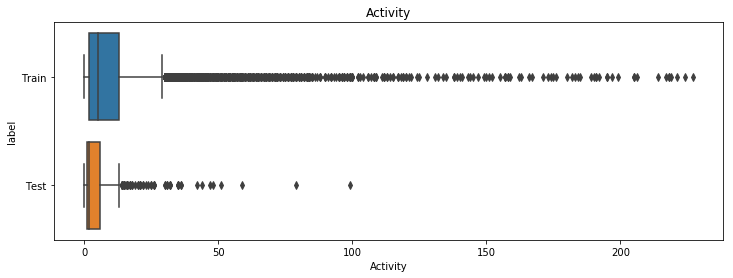

In [41]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="Activity", y="label", orient="h", data=dataset)
ax.set_title("Activity")
pass

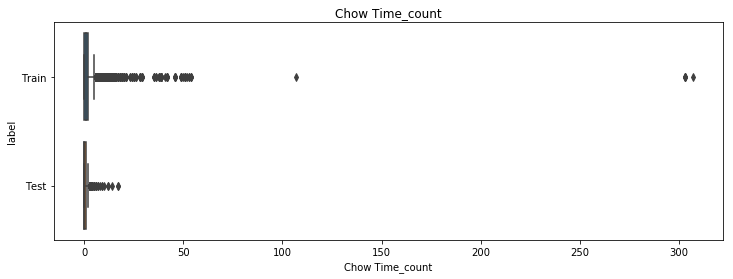

In [42]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="Chow Time_count", y="label", orient="h", data=dataset)
ax.set_title("Chow Time_count")
pass

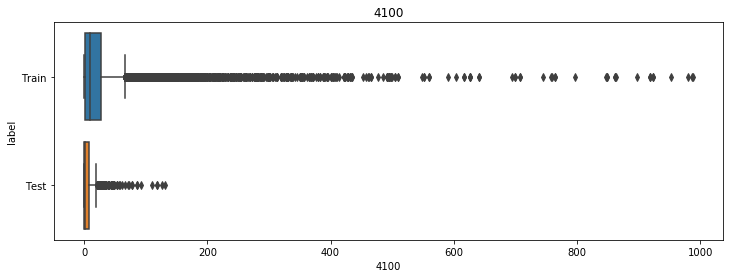

In [43]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="4100", y="label", orient="h", data=dataset)
ax.set_title("4100")
pass

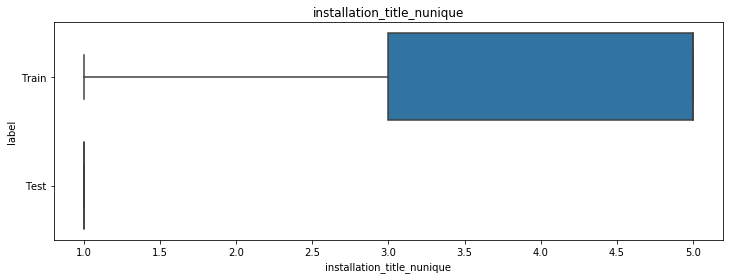

In [44]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="installation_title_nunique", y="label", orient="h", data=dataset)
ax.set_title("installation_title_nunique")
pass

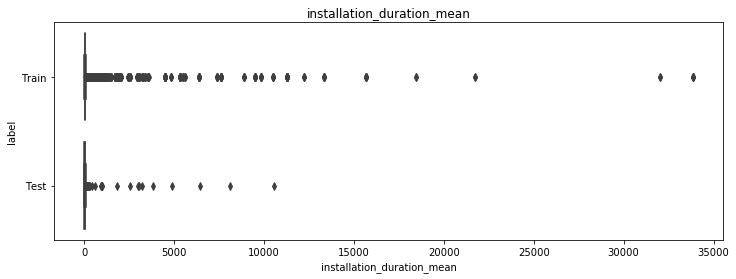

In [45]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="installation_duration_mean", y="label", orient="h", data=dataset)
ax.set_title("installation_duration_mean")
pass

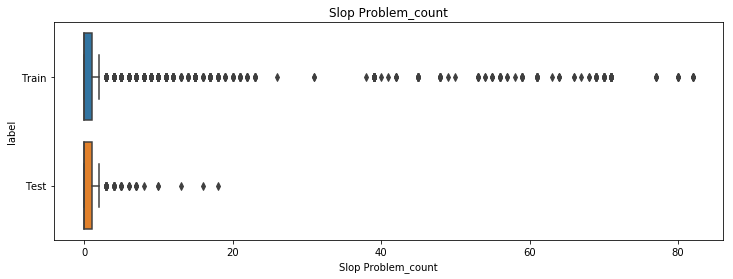

In [46]:
plt.figure(figsize=(12, 4))
ax = sb.boxplot(x="Slop Problem_count", y="label", orient="h", data=dataset)
ax.set_title("Slop Problem_count")
pass